In [1]:
import wfdb
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(r_signal, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order = order)
    f_signal = filtfilt(b, a, r_signal)
    return f_signal

In [3]:
record_dir = "F:\\physionet.org\\files\\music-sudden-cardiac-death\\1.0.1\\Holter_ECG"
record_path = f"{record_dir}/P0043"
record = wfdb.rdrecord(record_path, channels=[0, 1, 2]) # Read only the first 3 leads by index
signals = record.p_signal.astype(np.float32)
fs = record.fs
lead_1 = signals[:, 0]
lead_2 = signals[:, 1]
lead_3 = signals[:, 2]

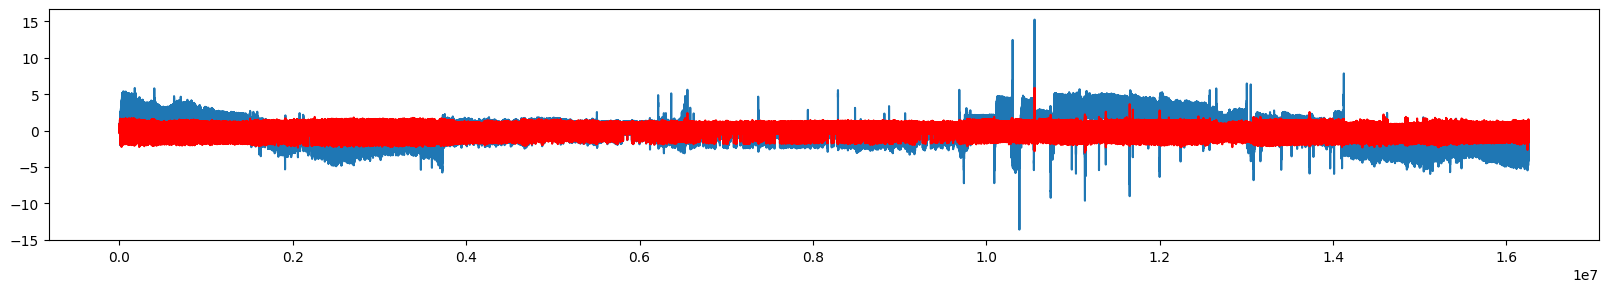

In [4]:
r_signal = lead_1
f_signal = butter_bandpass_filter(r_signal, 1, 40, fs, order=5)

plt.figure(figsize=(20,3))
plt.plot(r_signal)

plt.plot(f_signal,'r')
plt.show()

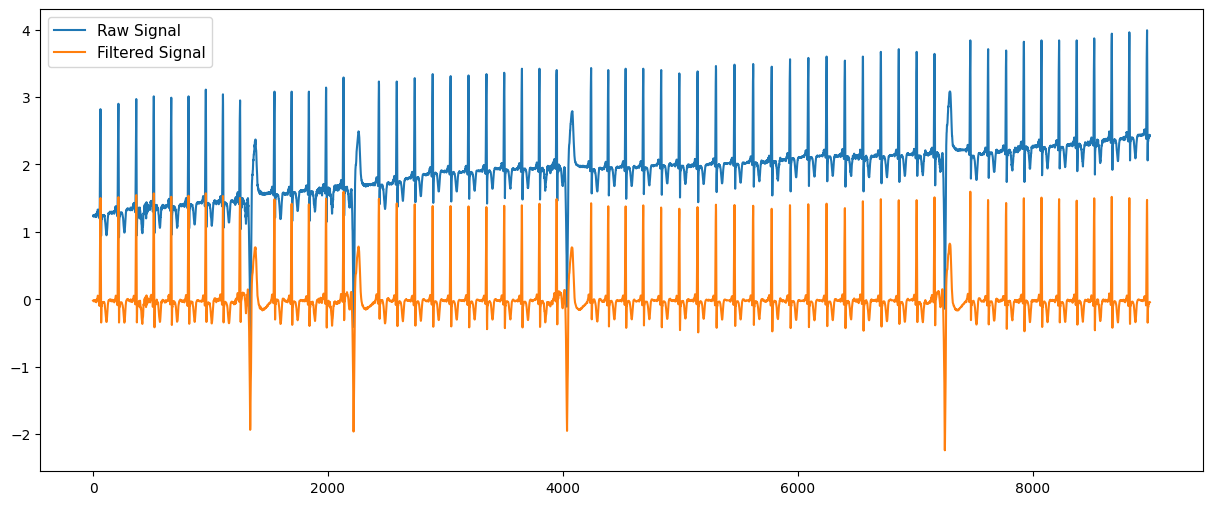

In [16]:
plt.figure(figsize=(15,6))
plt.plot(r_signal[17000:26000], label="Raw Signal")
plt.plot(f_signal[17000:26000], label="Filtered Signal")
plt.legend(fontsize=11)